In [12]:
import numpy as np
import os
import random 
import unittest
import matplotlib.pyplot as plt
import gymnasium as gym
from gymnasium import wrappers
import tensorflow as tf
from tensorflow.keras import layers, models
import time
import uuid
import math
import pandas as pd

In [13]:
MAX_STEPS = 500
SCENARIOS_COUNT = 10
#SCENARIOS = [42, 43, 44, 45, 46, 47, 48, 49, 50, 51]
SCENARIOS = [42, 43, 44, 45, 46, 47]

In [14]:
def extract_array(input, start_index, dx, dy, reduce = True):
    c = dx * dy
    arr = input[start_index: start_index + c]
    nparr = np.array(arr)

    if dy == 1 and reduce:
        if dx == 1:
            nparr =arr[0]
        else:
            nparr = nparr.reshape((dx, ))
    else:
        nparr = nparr.reshape((dx, dy))
        
    return nparr

In [15]:
# Activation functions
def relu(x):
    return np.maximum(0, x)

In [16]:
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [17]:
class SimpleNN_C:
    def __init__(self):
        # Initialize weights and biases
        self.W0 = np.random.randn(8, 8) * 0.01
        self.b0 = np.zeros((1, 8))
        self.W1 = np.random.randn(8, 8) * 0.01
        self.b1 = np.zeros((1, 8))
        self.W2 = np.random.randn(8, 8) * 0.01
        self.b2 = np.zeros((1, 8))
        self.W3 = np.random.randn(8, 4) * 0.01
        self.b3 = np.zeros((1, 4))

    def set_trainable_weights(self, input_weights):
        start_index = 0

        dx = 8
        dy = 8
        self.W0 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 8
        self.b0 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy   
        
        dx = 8
        dy = 8
        self.W1 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 8
        self.b1 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        

        dx = 8
        dy = 8
        self.W2 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 8
        self.b2 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        
        
        dx = 8
        dy = 4
        self.W3 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 4
        self.b3 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        
        #print('start_index ' + str(start_index))

    def forward(self, X):
        # Forward pass
        self.Z0 = np.dot(X,       self.W0) + self.b0
        self.A0 = relu(self.Z0)
        self.Z1 = np.dot(self.A0, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)
        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = softmax(self.Z3)
        return self.A3

    def predict(self, X):
        # Predict method
        probabilities = self.forward(X)
        return probabilities

In [18]:
class SimpleNN_D:
    def __init__(self):
        # Initialize weights and biases
        self.W0 = np.random.randn(8, 16)
        self.b0 = np.zeros((1, 16))
        self.W1 = np.random.randn(16, 16)
        self.b1 = np.zeros((1, 16))
        self.W2 = np.random.randn(16, 16) 
        self.b2 = np.zeros((1, 16))
        self.W3 = np.random.randn(16, 16) 
        self.b3 = np.zeros((1, 16))
        
        self.WX = np.random.randn(16, 4) 
        self.bX = np.zeros((1, 4))

    def set_trainable_weights(self, input_weights):
        start_index = 0

        dx = 8
        dy = 16
        self.W0 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 16
        self.b0 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy   

        
        dx = 16
        dy = 16
        self.W1 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 16
        self.b1 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        

        
        dx = 16
        dy = 16
        self.W2 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 16
        self.b2 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        

        
        dx = 16
        dy = 16
        self.W3 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 16
        self.b3 = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        

        
        dx = 16
        dy = 4
        self.WX = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy

        dx = 1
        dy = 4
        self.bX = extract_array(input_weights, start_index, dx, dy)
        start_index += dx * dy        
        #print('start_index ' + str(start_index))
        

    def forward(self, X):
        # Forward pass
        self.Z0 = np.dot(X,       self.W0) + self.b0
        self.A0 = relu(self.Z0)
        
        self.Z1 = np.dot(self.A0, self.W1) + self.b1
        self.A1 = relu(self.Z1)
        
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = relu(self.Z2)

        self.Z3 = np.dot(self.A2, self.W3) + self.b3
        self.A3 = relu(self.Z3)
        
        self.ZX = np.dot(self.A3, self.WX) + self.bX
        self.AX = softmax(self.ZX)
        return self.AX
        

    def predict(self, X):
        # Predict method
        probabilities = self.forward(X)
        return probabilities

In [19]:
test_net = SimpleNN_C()
ws = np.random.normal(0.0, 1.0, 252)
test_net.set_trainable_weights(ws)
test_input = ws = np.random.normal(0.0, 1.0, 8)
test_net.predict(test_input)

test_net = SimpleNN_D()
ws = np.random.normal(0.0, 1.0, 1028)
test_net.set_trainable_weights(ws)
test_input = ws = np.random.normal(0.0, 1.0, 8)
test_net.predict(test_input)

array([[1.00000000e+00, 6.62942125e-22, 1.14892891e-57, 2.29818558e-51]])

In [20]:
def create_environment():
    global MAX_STEPS
    env = gym.make("LunarLander-v2", render_mode = None, enable_wind = False, max_episode_steps = MAX_STEPS)
    observation, info = env.reset(seed=42)    
    return env

In [21]:
def generate_normal_random_number(sigma):
    return np.random.normal(0.0, sigma)

In [22]:
def generate_random_number():
    return np.random.rand()

In [23]:
def generate_random_numbers(count):
    return np.random.rand(count)

In [24]:
generate_random_numbers(10)

array([0.48844717, 0.49589339, 0.95382468, 0.15824926, 0.29149487,
       0.49163509, 0.74717025, 0.84550826, 0.77914285, 0.94090017])

In [25]:
def fitness_function(chromosome):
    global MAX_STEPS
    global SCENARIOS_COUNT
    global SCENARIOS

    MODEL.set_trainable_weights(chromosome)

    summary_fitness = 0.0

    ds = []
    ixs = []
    rs = []
    #fs = []
    
    for sc in SCENARIOS: #range(0, SCENARIOS_COUNT):
    
        observation, info = ENV.reset(seed = sc)
    
        for ix in range(MAX_STEPS):
            observation_2 = np.expand_dims(observation, axis=0)
            action_prob = MODEL.predict(observation_2)
            
            action = np.argmax(action_prob)
            observation, reward, terminated, truncated, info = ENV.step(action)
    
            if terminated or truncated:
                break   

        px = observation[0]
        py = observation[1]

        distance = math.sqrt(px * px + py * py)
        distance_alt = 1 + distance * 3
        #distance_alt_mult = distance_alt ** 4

        #reward_shifted = reward + 102
    
        #fitness = (reward_shifted ** 2) / distance_alt
        ixs.append(ix)
        ds.append(distance)
        rs.append(reward)
        #fs.append(fitness)

    mean_ixs = np.mean(ixs)
    mean_reward = np.mean(rs)
    mean_distance = np.mean(ds)
    fitness = (mean_reward + 102) ** 2 / ((1 + mean_distance) * (1 + mean_ixs / 1000))
    
    return (fitness, np.mean(rs), np.mean(ixs), np.mean(ds), rs, ixs)

In [26]:
def compute_fitness(ch):
    global MAX_FITNESS
    time_start = time.time()
    (fitness, reward, ix, distance, rss, ixs) = fitness_function(ch.chromosome)
    time_end = time.time()
    time_diff = time_end - time_start
    #print((fitness, reward, ix, time_diff))
    if fitness > MAX_FITNESS:
        print((fitness, reward, ix, time_diff, distance, rss, ixs))
        MAX_FITNESS = fitness
    return (fitness, reward, distance)

In [27]:
class Chromosome(object):

    def __init__(self, ch, compute_fitness_required = True):
        self.chromosome = ch[:]
        self.id = uuid.uuid4()

        if compute_fitness_required:
            (fitness, reward, distance) = compute_fitness(self)
        else:
            fitness = 0.0
            reward = -100
            distance = 10000000
        
        self.fitness = fitness
        self.reward = reward
        self.distance = distance

    def __str__(self):
        return f'Chromosome:{self.chromosome}, fitness:{self.fitness}, reward:{self.reward}'

    def __repr__(self):
        return self.__str__()

In [28]:
def generate_random_float_chromosome(ch_le):
    return np.random.normal(0.0, 1.0, ch_le)

In [29]:
def generate_random_population(count, ch_le):
    res = []
    for _ in range(0, count):
        ch = generate_random_float_chromosome(ch_le)

        chromosome = Chromosome(ch)
        
        res.append(chromosome)

    return res

In [30]:
def mutate_chromosome_2(source_chromosome, mutation_probability, mutation_sigma):
    mutated = False
    chromosome = Chromosome(source_chromosome.chromosome[:], False)

    if generate_random_number() <= mutation_probability:
        ix = int(generate_random_number() * len(chromosome.chromosome))
        chromosome.chromosome[ix] += generate_normal_random_number(mutation_sigma)
        mutated = True

    (fitness, reward, distance) = compute_fitness(chromosome)
    
    chromosome.fitness = fitness
    chromosome.reward = reward
    chromosome.distance = distance

    return chromosome

In [31]:
def mutate_chromosome(source_chromosome, mutation_probability, mutation_sigma):
    mutated = False
    chromosome = Chromosome(source_chromosome.chromosome[:], False)

    nums = generate_random_numbers(len(chromosome.chromosome))

    ix = 0
    for rn in nums:
        if rn <= mutation_probability:
            chromosome.chromosome[ix] += generate_normal_random_number(mutation_sigma)
            mutated = True
        ix += 1

    (fitness, reward, distance) = compute_fitness(chromosome)
    
    chromosome.fitness = fitness
    chromosome.reward = reward
    chromosome.distance = distance

    return chromosome

In [32]:
def crossover_chromosome_pair_with_cutpoints(cha, chb, cut_points, require_fitness = True):
    ch_len = len(cha.chromosome)
    chx = cha.chromosome
    chy = chb.chromosome
    for cut_point in cut_points:
        chx2 = np.concatenate((chx[0:cut_point], chy[cut_point: ch_len]))
        chy2 = np.concatenate((chy[0:cut_point], chx[cut_point: ch_len]))
        chx = chx2
        chy = chy2

    ch1 = Chromosome(chx, require_fitness)
    ch2 = Chromosome(chy, require_fitness)

    return (ch1, ch2)

In [ ]:
t1 = Chromosome([0,0,0,0,0,0,0,0,0,0], False)
t2 = Chromosome([1,1,1,1,1,1,1,1,1,1], False)
crossover_chromosome_pair_with_cutpoints(t1, t2, [1,3,5,7,9], False)

In [33]:
def get_nonrepeating_random_numbers(max_value, count):
    result = set()
    for _ in range(0, count):
        while True:
            val = int(generate_random_number() * max_value)
            if val in result:
                continue
            else:
                result.add(val)
                break

    return sorted(list(result))
        

In [34]:
get_nonrepeating_random_numbers(1000, 10)

[108, 119, 144, 182, 559, 574, 638, 717, 878, 989]

In [35]:
def crossover_chromosome_pair(cha, chb, cut_points_count, require_fitness = True):
    ch_len = len(cha.chromosome)
    cut_points_count = int(random.random() * (cut_points_count + 1))

    if cut_points_count == 0:
        return (cha, chb)

    cut_points = get_nonrepeating_random_numbers(ch_len, cut_points_count)

    ch1, ch2 = crossover_chromosome_pair_with_cutpoints(cha, chb, cut_points, require_fitness)
    
    return (ch1, ch2)

In [ ]:
t1 = Chromosome([0,0,0,0,0,0,0,0,0,0], False)
t2 = Chromosome([1,1,1,1,1,1,1,1,1,1], False)
crossover_chromosome_pair(t1, t2, 3, False)

In [36]:
def compute_summary_fitness(population):
    summary_fitness = 0.0

    for ch in population:
        summary_fitness += ch.fitness

    return summary_fitness

In [37]:
def select_chromosome(old_population, summary_fitness):
    selector_value = summary_fitness * generate_random_number()
    sum = 0.0
    for ch in old_population:
        sum += ch.fitness
        if selector_value <= sum:
            return ch

    raise ValueError(f"WTF1 {sum} {selector_value}")

In [38]:
def select_chromosome_no_twins(old_population, summary_fitness, first_selected):
    selector_value = summary_fitness * generate_random_number()
    sum = 0.0
    ix = 0
    for ch in old_population:
        sum += ch.fitness
        if selector_value <= sum:
            if first_selected is None or first_selected != ch:
                return ch
            else:
                return old_population[ix - 1]
        ix += 1

    raise ValueError(f"WTF2 {sum} {selector_value}")

In [54]:
def generate_new_population(
    old_population, 
    new_population_size, 
    mutation_probability, 
    mutation_sigma, 
    cut_points_count,
    keep_last_best_count):
    
    new_population = []
    summary_fitness = compute_summary_fitness(old_population)
    old_best = find_best_chromosome(old_population)

    for ix in range(0, new_population_size // 2):
        cha = select_chromosome(old_population, summary_fitness)
        chb = select_chromosome_no_twins(old_population, summary_fitness, cha)

        (chc, chd) = crossover_chromosome_pair(cha, chb, cut_points_count)
        che = mutate_chromosome(chc, mutation_probability, mutation_sigma)
        chf = mutate_chromosome(chd, mutation_probability, mutation_sigma)

        #if chc.fitness > che.fitness:
        #    ch1 = chc
        #else:
        #    ch1 = che
        ch1 = che

        #if chd.fitness > chf.fitness:
        #    ch2 = chd
        #else:
        #    ch2 = chf
        ch2 = chf

        #print((ch1.fitness,ch1.reward))
        #print((ch2.fitness,ch2.reward))

        new_population.append(ch1)
        new_population.append(ch2)

        #print(((cha.fitness, cha.reward),(chb.fitness, chb.reward),(ch1.fitness, ch1.reward),(ch2.fitness, ch2.reward)))

    if keep_last_best_count > 0:
        old_population_sorted = sorted(old_population, key = lambda x: x.fitness, reverse = True)
        new_population.extend(old_population_sorted[0: keep_last_best_count])

    new_summary_fitness = compute_summary_fitness(new_population)

    print(('Summary fitness old vs new', summary_fitness, new_summary_fitness))
    
    return new_population

In [55]:
def find_best_chromosome(population):
    res = population[0]
    
    for ch in population:
        if ch.fitness > res.fitness:
            res = ch

    return res

In [56]:
def find_worst_chromosome(population):
    res = population[0]
    
    for ch in population:
        if ch.fitness < res.fitness:
            res = ch

    return res

In [57]:
def main_loop(
    iterations, 
    initial_population_size, 
    chromosome_length, 
    mutation_probability, 
    log_best, 
    mutation_sigma, 
    cut_points_count,
    keep_last_best_count):
    
    population = generate_random_population(initial_population_size, chromosome_length)

    best_fitness = []
    worst_fitness = []
    best_history = []
    summary_fitness_history = []
    
    for ix in range(0, iterations):
        print('Iteration ' + str(ix))
        new_population = generate_new_population(population, initial_population_size, mutation_probability, mutation_sigma, cut_points_count, keep_last_best_count)
        new_summary_fitness = compute_summary_fitness(new_population)

        del population
        population = new_population
        best = find_best_chromosome(population)
        worst = find_worst_chromosome(population)
        
        best_fitness.append(best.fitness)
        worst_fitness.append(worst.fitness)
        best_history.append(best)
        summary_fitness_history.append(new_summary_fitness)
        
        if log_best:
            print(f"Best {best.fitness} {best.reward} {best.distance}")

    result = (find_best_chromosome(best_history), population, best_fitness, worst_fitness, best_history, summary_fitness_history)

    return result

In [65]:
initial_population_size = 2000
chromosome_length = 252 #1028 #252  #756
mutation_probability = 0.05
mutation_sigma = 1.0
max_cut_points = 20
keep_last_best_count = 10

In [66]:
ENV = create_environment()

In [67]:
MODEL = SimpleNN_C()

In [68]:
MAX_FITNESS = 0.0

In [69]:
pop = generate_random_population(5, chromosome_length)

(2.889904300224329, -100.0, 70.33333333333333, 0.038271188735961914, 0.29317553333315854, [-100, -100, -100, -100, -100, -100], [81, 59, 81, 68, 51, 82])


In [70]:
mutate_chromosome(pop[0], 0.1, mutation_sigma)

Chromosome:[-0.7240073   0.0752061   0.46732275 -0.50718999  1.16692747  0.25731735
 -0.12727422 -0.51900559  1.57052448 -0.40733701  0.19393644  1.11548439
 -1.35563807  0.85451891 -0.41680823 -0.98228362 -1.68398081 -0.14025009
  0.23186672  2.52811691 -0.80892746  0.97161774  0.9022283  -1.46771752
 -0.58350096 -0.1143287   0.04625457 -1.59686464  1.13818345 -1.8158846
  0.35912141  2.39013929 -0.40780388 -1.34364599 -0.53936029  0.19832076
  0.42908452  0.34329017 -0.49645376  2.45390065 -1.22412112  0.36074894
  0.41016458  1.85879836  0.10990819  0.05860101 -0.95879887 -0.59486552
  0.07680501  0.59006193 -0.69799709 -1.30539154 -0.17748349 -0.66646242
 -1.79519801 -1.31510612 -1.36925137  1.42096289 -0.4778417   0.313517
  0.78213162  0.61233839 -1.76806292 -0.99329255 -1.37684762 -0.71549502
  1.09078728 -0.66762842 -1.22897297 -0.67048954  1.21637194  1.1600318
 -1.28564791 -0.45436128 -0.19083553 -0.66684259  1.81177056  0.89733438
  1.88889211  1.85726521 -0.88703193  0.8378

In [71]:
result = main_loop(100, initial_population_size, chromosome_length, mutation_probability, True, mutation_sigma, max_cut_points, keep_last_best_count)

(3.1617078391965965, -100.0, 69.33333333333333, 0.0272061824798584, 0.18311006876678523, [-100, -100, -100, -100, -100, -100], [78, 62, 82, 65, 51, 78])
(3.1820059515454298, -100.0, 73.5, 0.031359195709228516, 0.17100016145156374, [-100, -100, -100, -100, -100, -100], [87, 59, 86, 72, 52, 85])
(3.229966939381636, -100.0, 69.0, 0.0315093994140625, 0.15846844577447503, [-100, -100, -100, -100, -100, -100], [78, 59, 82, 65, 50, 80])
(615.088684934717, -66.66666666666667, 125.33333333333333, 0.08751368522644043, 0.8036418344486062, [-100, -100, -100, -100, -100, 100], [147, 70, 95, 115, 99, 226])
Iteration 0
(647.8536636507242, -66.66666666666667, 124.5, 0.03987717628479004, 0.7136922877438315, [-100, -100, -100, -100, -100, 100], [147, 70, 91, 115, 98, 226])
(655.6279632419191, -66.66666666666667, 112.0, 0.06593084335327148, 0.7124068854197306, [-100, -100, -100, -100, -100, 100], [147, 69, 89, 117, 97, 153])
(667.4422867572273, -66.66666666666667, 158.33333333333334, 0.06811070442199707,

In [72]:
import pickle

In [73]:
with open('c:/my/al_gen_res_20240919_all_100.bin', 'wb') as file: 
    pickle.dump(result, file) 

In [74]:
(best, population, best_fitness, worst_fitness, best_history, summary_fitness_history) = result

In [75]:
obj = pd.read_pickle('c:/my/al_gen_res_20240919_all_100.bin')

In [76]:
(best, population, best_fitness, worst_fitness, best_history, summary_fitness_history) = obj

In [77]:
best = find_best_chromosome(best_history)

In [78]:
best

Chromosome:[-1.51820466e+00  8.68930441e-01 -3.15218872e+00 -4.25072864e-01
  2.37233624e+00  6.29500918e-01 -4.97249575e+00  2.59873146e+00
 -1.22421972e+00 -1.46903435e+00 -3.01034224e-01 -7.37379923e-01
  4.70920999e-01  1.77198055e+00 -4.06588721e-01  6.48601393e-02
 -3.62906394e+00 -4.63551329e-02 -1.07592203e+00 -1.45193158e+00
  8.67557533e-02 -2.45420329e+00  1.52762794e+00  3.22815377e+00
 -2.10305213e+00  2.17388248e+00  4.56435035e-01 -2.17270181e+00
 -1.62021391e+00  5.52997606e+00  1.10032195e+00  2.68154785e-01
  3.50371235e+00 -1.18853321e+00 -4.16758479e-01  4.42904299e-01
 -2.11098144e+00 -6.16819934e-01  2.36382805e-01 -4.53683774e+00
  7.09123308e+00 -1.29310421e+00 -2.35659873e+00 -2.78410518e+00
  4.46574326e-01  3.02825447e-01  3.28719330e+00 -2.38560125e+00
  9.03298983e-01  3.36897949e-01  5.68295685e-01  3.95006270e+00
 -3.93645258e+00 -1.10422580e+00 -3.01070617e+00  1.82374164e+00
 -1.36088721e+00 -5.62508414e-02 -2.14242177e+00 -5.52195550e-01
  3.13720209e-

In [79]:
ENV.close()

In [80]:
MODEL.set_trainable_weights(best.chromosome)

In [88]:
test_env = gym.make("LunarLander-v2", render_mode = 'human', enable_wind = False, max_episode_steps = 100000)

In [89]:
observation, info = test_env.reset(seed = SCENARIOS[0])

In [90]:
for sc in SCENARIOS:
    observation, info = test_env.reset(seed = sc)    
    for ix in range(1000):
        observation_2 = np.expand_dims(observation, axis=0)
        action_prob = MODEL.predict(observation_2)
        
        action = np.argmax(action_prob)
        observation, reward, terminated, truncated, info = test_env.step(action)
    
        if terminated or truncated:
            break

test_env.close()

In [85]:
mean_fitness = [x / 1000.0 for x in summary_fitness_history]

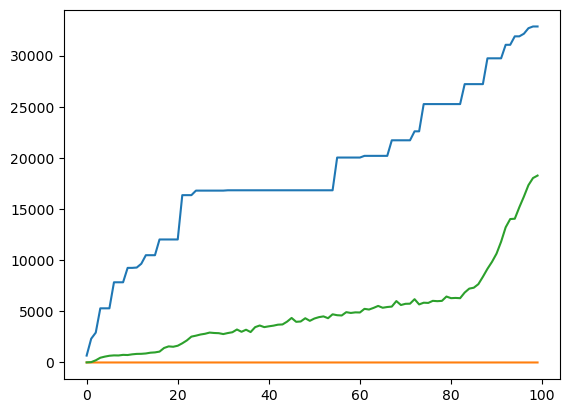

In [86]:
plt.plot(best_fitness)
plt.plot(worst_fitness)
plt.plot(mean_fitness)
plt.show()

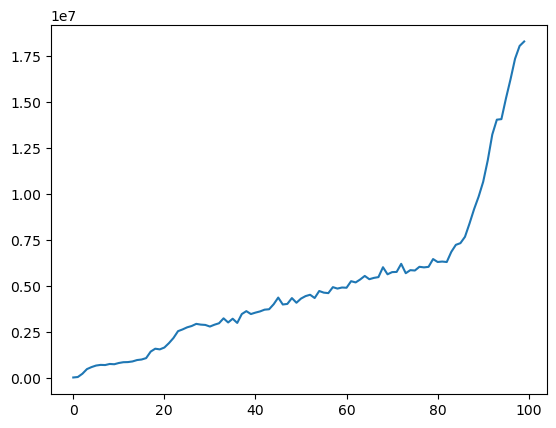

In [87]:
plt.plot(summary_fitness_history)
plt.show()